In [2]:
from openket import *
from scipy.integrate import odeint
from sympy import var, I
import numpy as np
import matplotlib.pyplot as plt
import math

2025-09-09 20:10:07,999 - openket - INFO - openket v0.1.0 initialized successfully.


In [3]:
hbar = 1.
omega = 1.0  # frecuencia de la cavidad (unidad de referencia)
t = np.linspace(0, 15, 500)
nmax = 5#8 # truncación del espacio de Hilbert (número de estados de Fock)
base = [Ket(i, "campo") for i in range(nmax)]

rho = Operator("R")
a = AnnihilationOperator("campo", nmax-1)
aa = CreationOperator("campo", nmax-1)
H = hbar * omega * (aa * a + 1 / 2) # Hamiltoniano del oscilador armónico cuántico

# Condición inicial: estado coherente |alpha⟩
alpha = 1 #1.5
state_alpha = 0
for i in range(nmax):
        state_alpha = state_alpha + ((alpha**2) / math.sqrt(math.factorial(i))) * Ket(i,"campo")
state_alpha = np.exp(-(np.abs(alpha)**2)/2) * state_alpha
rho0 = state_alpha * dag(state_alpha)

In [4]:
resultados = {}

In [5]:
kappa = 0

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func0.py")
from func0 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [6]:
kappa = 0.1

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func1.py")
from func1 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [7]:
kappa = 0.3

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func3.py")
from func3 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [8]:
kappa = 0.5

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func5.py")
from func5 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [9]:
kappa = 2.

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func2.py")
from func2 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [10]:
kappa = 8.

# ecuación de movimiento de Lindblad
rdot = I/hbar * comm(H,rho) + (kappa/2)*(2*a*rho*aa - aa*a*rho - rho*aa*a)

# generación del archivo de EDOs (se sobrescribe en cada iteración)
#build_ode(rho=rho, rdot=rdot, basis=base, filetype="Scipy", filename=f"func8.py")
from func8 import dic, f

# convertir condiciones iniciales simbólicas -> numéricas
init_conditions = init_state(rho=rho, rho0=rho0, basis=base, dic=dic)

# solución numérica
solution = odeint(f, init_conditions, t)
resultados[kappa] = solution

In [11]:
# Valores esperados
# definición simbólica de los observables
N = aa * a # operador de número
X = (1/np.sqrt(2)) * (a+aa) # cuadratura X adimensional
P = (1/np.sqrt(2)) * I*(aa-a) # cuadratura P adimensional

N_symb = sub_qexpr(qexpr=trace(rho * N, basis=base), dic=dic)
X_symb = sub_qexpr(qexpr=trace(rho * X, basis=base), dic=dic)
P_symb = sub_qexpr(qexpr=trace(rho * P, basis=base), dic=dic)

Graficando para kappa = 0...
Graficando para kappa = 0.1...
Graficando para kappa = 0.5...
Graficando para kappa = 2.0...


<Figure size 1000x600 with 0 Axes>

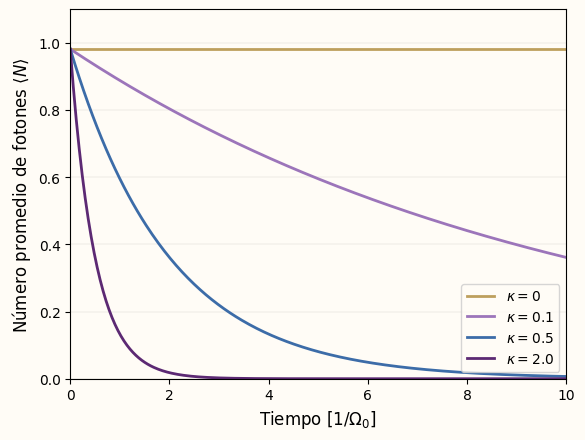

In [20]:
kappas = [0, 0.1, 0.5, 2.0] # Tasas de decaimiento (unidades de omega)
colores = ["#BD9F5D", "#9c75ba", "#3c6ca8", "#5c2973"]

plt.figure(figsize=(10, 6))
plt.figure(facecolor='#fffcf6')
plt.rcParams['axes.facecolor'] = '#fffcf6'
for kappa, color in zip(kappas, colores):
    print(f"Graficando para kappa = {kappa}...")
    solution = resultados[kappa]
    # Calcular valores esperados a partir de la solución
    N_expect = sym2num(sol=solution, symbexpr=N_symb)
    # Subplot 1: Número de fotones ⟨N⟩
    plt.plot(t, np.real(N_expect), color=color, label=f'$κ = {kappa}$', linewidth=2)

#plt.title(f'Dinámica disipativa de un oscilador cuántico para ⟨N⟩(0)={alpha**2}', fontsize=14)
plt.xlabel('Tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('Número promedio de fotones $\\langle N \\rangle$', fontsize=12)
plt.legend()
plt.grid(axis='y', color='gray', linewidth=0.1)
plt.ylim(0, 1.1)
plt.xlim(0, 10)
plt.savefig("OAA-N.png")

Graficando para kappa = 0...
Graficando para kappa = 0.1...
Graficando para kappa = 0.5...
Graficando para kappa = 2.0...


<Figure size 1000x600 with 0 Axes>

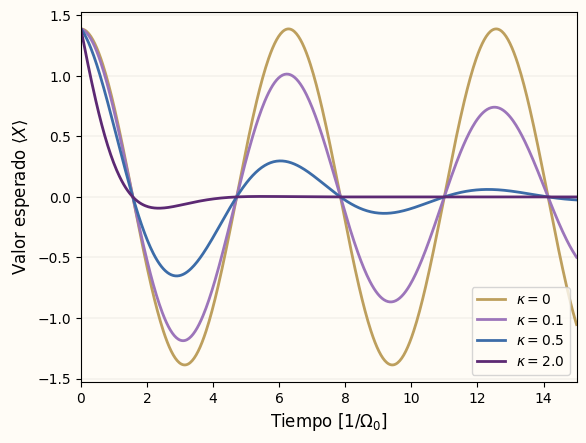

In [19]:
kappas = [0, 0.1, 0.5, 2.0] # Tasas de decaimiento (unidades de omega)
colores = ["#BD9F5D", "#9c75ba", "#3c6ca8", "#5c2973"]

plt.figure(figsize=(10, 6))
plt.figure(facecolor='#fffcf6')
plt.rcParams['axes.facecolor'] = '#fffcf6'
for kappa, color in zip(kappas, colores):
    print(f"Graficando para kappa = {kappa}...")
    solution = resultados[kappa]
    # Calcular valores esperados a partir de la solución
    X_expect = sym2num(sol=solution, symbexpr=X_symb)
    # Subplot 1: Número de fotones ⟨N⟩
    plt.plot(t, np.real(X_expect), color=color, label=f'$κ = {kappa}$', linewidth=2)

#plt.title('Evolución de la amplitud del campo', fontsize=14)
plt.xlabel('Tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('Valor esperado $\\langle X \\rangle$', fontsize=12)
plt.legend()
plt.grid(axis='y', color='gray', linewidth=0.1)
plt.xlim(0, 15.01)
plt.savefig("OAA-X.png")

Graficando para kappa = 0...
Graficando para kappa = 0.1...
Graficando para kappa = 0.5...
Graficando para kappa = 2.0...


<Figure size 1000x600 with 0 Axes>

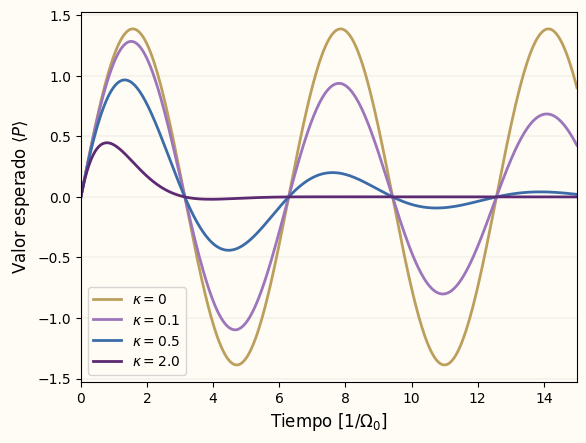

In [21]:
kappas = [0, 0.1, 0.5, 2.0] # Tasas de decaimiento (unidades de omega)
colores = ["#BD9F5D", "#9c75ba", "#3c6ca8", "#5c2973"]

plt.figure(figsize=(10, 6))
plt.figure(facecolor='#fffcf6')
plt.rcParams['axes.facecolor'] = '#fffcf6'
for kappa, color in zip(kappas, colores):
    print(f"Graficando para kappa = {kappa}...")
    solution = resultados[kappa]
    # Calcular valores esperados a partir de la solución
    P_expect = sym2num(sol=solution, symbexpr=P_symb)
    # Subplot 1: Número de fotones ⟨N⟩
    plt.plot(t, np.real(P_expect), color=color, label=f'$κ = {kappa}$', linewidth=2)

#plt.title('Evolución de la amplitud del campo', fontsize=14)
plt.xlabel('Tiempo [$1/Ω_0$]', fontsize=12)
plt.ylabel('Valor esperado $\\langle P \\rangle$', fontsize=12)
plt.legend()
plt.grid(axis='y', color='gray', linewidth=0.1)
plt.xlim(0, 15)
plt.savefig("OAA-P.png")